<a href="https://colab.research.google.com/github/naveenpittala/Assignmnet1/blob/K-means/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#week3
# Date : 23-02-2020 




In [0]:
#k means algorithm
#
from google.colab import files
uploaded = files.upload()
#It is the code to get upload option for our dataset so that we can upload our data using this code and this code is nowhere related to python.



Saving dataset.csv to dataset.csv


In [0]:
#we will load runs and wickets 
import io
import pandas as pd
df2 = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))
data=df2.values

wickets=(data[:,0]) #numpy array = : represents the 0th column 
runs=(data[:,1])


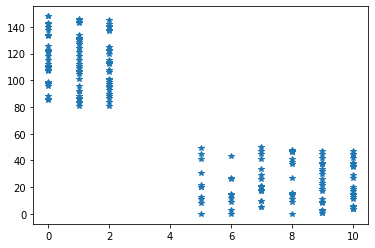

In [0]:
#importing the matplotlib and plotting wickets and runs for plotting the data
import matplotlib.pyplot as plt
import numpy as np
plt.plot(wickets,runs,'*')

plt.show()

In [0]:
#normalizing the data to 1 of wickets and runs because the dataset contains wickets upto range of 10 and runs upto range of 200. So we are making it to 1.
def normalize(x):
  num=x-np.min(x)
  den=np.max(x)-np.min(x)
  return (num/den)
wickets=normalize(wickets) 
runs=normalize(runs)

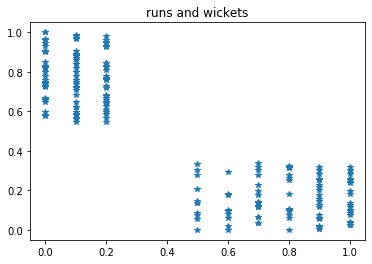

In [0]:
#graph after normalization
import matplotlib.pyplot as plt
import numpy as np
plt.plot(wickets,runs,'*')
plt.title('runs and wickets')

plt.show()

[[0.63672478 0.64534384]
 [0.50253465 0.37389214]]


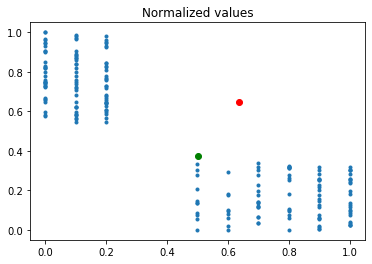

In [0]:
#generating random means(or centroids) and plot the  means along the dataset we have
k=2
means=[]
for i in range(k):
  x=np.random.rand()
  y=np.random.rand()
  means.append([x,y])
means=np.array(means)
print(means)
plt.plot(wickets,runs,'.')
plt.plot(means[0][0],means[0][1],'ro')
plt.plot(means[1][0],means[1][1],'go')

plt.title('Normalized values')
plt.show()

In [0]:
#voting part (for each point in the population,store the leader)
def distance(a,b):
  """
  a and b are list of 2 coordinates (x and y)
  example:
  a=[1,2]
  b=[2,3]
  """
  k=np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)
  return(k)
distance(means[0],means[1])  #to calculate distance between two means

0.30280855067400936

In [0]:
def closest_mean(x,means):

#calculate the closest mean from the point 'x'

  k=len(means)
  d=float('inf')
  idx=-1

  for i in range(k):
    
    temp= distance(means[i],x)
    if temp<d:
      d=temp
      idx=i
  return idx



[[0.1        0.76466216]
 [0.803      0.165     ]]


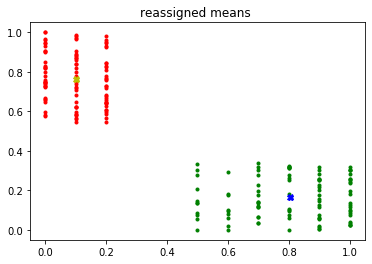

In [0]:
#iterate throught the dataset
count=0
count1=0
sum1=0
sum2=0
sum3=0
sum4=0
l=len(runs)
labels=[0]*l #length of array with l
labels1=[0]*l
for i in range(l):
  wicket=wickets[i]
  run=runs[i]
  x=np.array([wicket,run])
  label=closest_mean(x,means)
  
  if(label==0):
    count=count+1
    plt.plot(wickets[i],runs[i],'r.')
    sum1=sum1+wickets[i]
    sum3=sum3+runs[i]

  else:
    count1=count1+1
    plt.plot(wickets[i],runs[i],'g.')
    sum2=sum2+wickets[i]
    sum4=sum4+runs[i]
means[0]=(sum1/count,sum3/count)

means[1]=(sum2/count1,sum4/count1)


print(means)

plt.plot(means[0][0],means[0][1],'yX')
plt.plot(means[1][0],means[1][1],'bX')
plt.title("reassigned means ")
plt.show()




